In this project, students will develop a predictive model for estimating the customer lifetime
value (CLV) of an e-commerce business. They will begin by acquiring and preprocessing data 
using Python and SQL, extracting relevant customer and transactional data from the company's 
database. Using Pandas, students will perform advanced data analysis and manipulation to 
derive features for CLV prediction, such as customer demographics, purchase frequency, and 
monetary value.



They will then apply statistical analysis techniques to gain insights into customer behavior
and calculate probabilistic metrics related to customer retention and churn. The ultimate goal
is to build a robust predictive model that accurately forecasts CLV for individual customers, 
enabling the business to optimize marketing strategies, customer acquisition efforts, and 
overall revenue generation.

#### Problem Statement
This predictive model focuses on customer churn risk for a telecom provider by analyzing data on usage, billing, and customer service interactions. By identifying important churn indicators, will help us focus efforts on at-risk customers, potentially reducing churn rates and improving customer loyalty.

In [71]:
#import libraries 
import pandas as pd 
import numpy as np
df = pd.read_csv("telecom_churn.csv", header = 0)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [73]:
#check if any missing data
any_missing = df.isnull().values.any()

print(any_missing)

False


In [75]:
# Check for missing values in total 
print(df.isnull().sum())

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


In [77]:
# check the ratio of missing data, if lots of null values use other data sets
missing_ratio = df.isnull().sum() / len(df)
missing_ratio

Churn              0.0
AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64

In [85]:
#outliers using Z score
def detech_outliers(df, threshold =3):

    df = np.array(df, dtype=np.float64)
    mean=np.mean(df)
    std=np.std(df)

    
    z_scores=(df-mean)/std
    outliers = df[np.abs(z_scores) > threshold]    
    return outliers

In [87]:
outliers_pt=detech_outliers(df)

In [89]:
outliers_pt

array([265.1, 243.4, 299.4, 258.6, 332.9, 249.6, 229.3, 268.6, 251.5,
       241.8, 248.6, 235.8, 300.3, 249.5, 237.9, 252.9, 278.4, 251.8,
       238.1, 281.4, 229.8, 282.5, 239.8, 231. , 246.5, 231.9, 271.5,
       257.7, 260.4, 337.4, 243.1, 230.9, 237.1, 252.6, 232.1, 259.9,
       271.6, 232.4, 289.5, 326.5, 292.9, 243.8, 241.1, 250.2, 280.2,
       312. , 253.4, 262.4, 303.9, 230.6, 266.6, 234. , 272.1, 296.4,
       227.2, 248.7, 236.3, 232.4, 239.2, 272.6, 233.8, 260.2, 236.2,
       244.6, 257.1, 230. , 350.8, 242.1, 230.2, 229.6, 278.3, 234.4,
       264.3, 259.8, 256.5, 239.7, 239.9, 259.9, 248.8, 250.3, 243.4,
       288.7, 240.4, 278. , 273.4, 246.8, 286.7, 264.3, 256.4, 264.8,
       261.8, 240.3, 258.1, 233.8, 242.9, 273.6, 251.4, 265.9, 261.4,
       253.7, 231.3, 227.4, 310.4, 237.5, 234.5, 279.8, 237.1, 288.1,
       229.4, 293. , 228.6, 228.1, 309.9, 234.2, 335.5, 231.8, 239.8,
       293.3, 256.2, 299.5, 265.3, 252.9, 235.6, 261.7, 235.5, 263.8,
       242.5, 264.7,

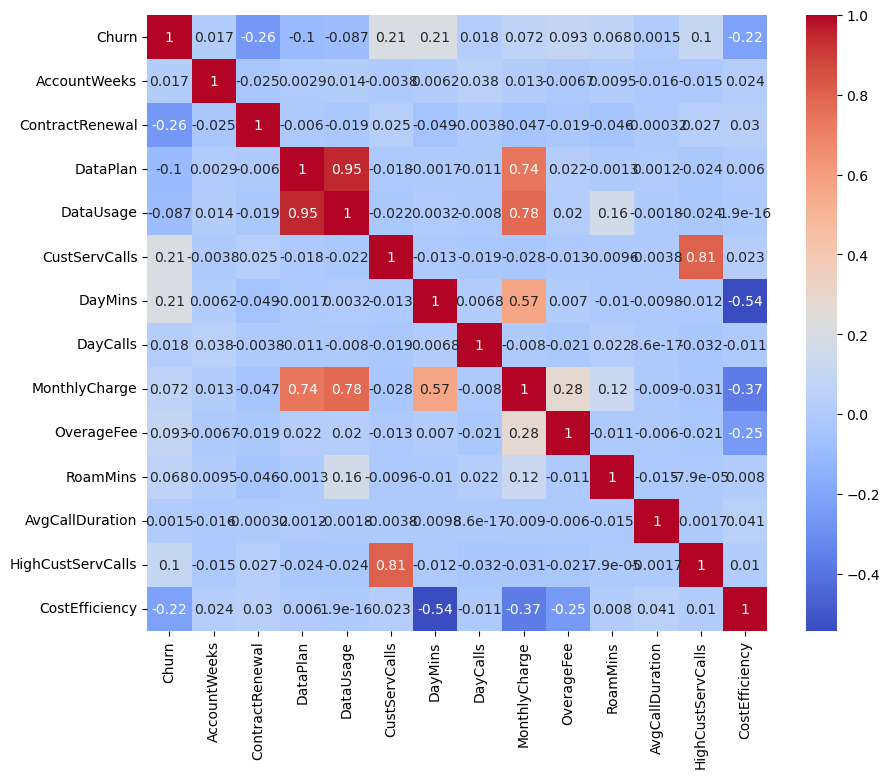

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [93]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [107]:
# Feature Engineering
df['AvgCallDuration'] = df['DayMins'] / (df['DayCalls'])  
df['HighCustServCalls'] = (df['CustServCalls'] > df['CustServCalls'].median()).astype(int) #customer unsatisfaction 
df['CostEfficiency'] = df['MonthlyCharge'] / (df['DataUsage'] )  # cost per data 

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define target and features for churn prediction
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9235382308845578
Precision: 0.8378378378378378
Recall: 0.6138613861386139
F1 Score: 0.7085714285714285


In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score: 0.7523227051994175


##### Report
In a nutshell, this report shows the potential to reduce churn, improve customer retention, and enhance customer satisfaction. Adding features like cutomers feedback, testing new modles and additional data sources would significatly imporve company performance in the future.